In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette
np.random.seed(0)

# Generating a dataset

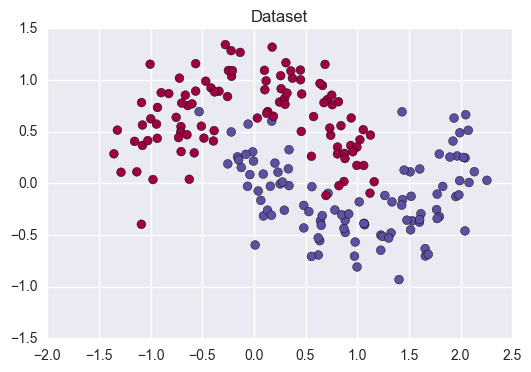

In [2]:
# Generate a dataset and plot it
num_examples = 200
X, Y = sklearn.datasets.make_moons(num_examples, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)
plt.title('Dataset')
plt.show()
X = np.insert(X,X.shape[1],values=1,axis=1)  #For constant term

In [3]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.insert(np.c_[xx.ravel(), yy.ravel()],np.c_[xx.ravel(), yy.ravel()].shape[1] ,values=1,axis=1))
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

# Logistic Regression

In [4]:
epsilon = 0.01 # learning rate for gradient descent

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W = model['W']
    # Calculate our predictions
    z = X.dot(W)
    probs = sigmoid(z)
    # Calculating the loss
    probs = Y.reshape(len(Y),1) * np.log(probs) + (1 - Y.reshape(len(Y),1)) * np.log(1 - probs)
    data_loss = np.sum(probs)
    return -1./num_examples * data_loss

In [7]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W = model['W']
    # Predict
    z = x.dot(W)
    probs = sigmoid(z)
#     probs[probs>0.5] = 1
#     probs[probs<=0.5] = 0
    return probs

In [8]:
# This function learns parameters for the Logistic Regression and returns the model.
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(num_passes=2000, print_loss=True):
     
    # Initialize the parameters to random values. We need to learn these.
    W = np.random.randn(X.shape[1],1)
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
        z = X.dot(W)
        probs = sigmoid(z)
        E = probs - Y.reshape(len(Y),1)
        W -= epsilon * (X.T).dot(E)
         
        # Assign new parameters to the model
        model = { 'W': W}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 100 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.683076
Loss after iteration 100: 0.300026
Loss after iteration 200: 0.299374
Loss after iteration 300: 0.299357
Loss after iteration 400: 0.299357
Loss after iteration 500: 0.299357
Loss after iteration 600: 0.299357
Loss after iteration 700: 0.299357
Loss after iteration 800: 0.299357
Loss after iteration 900: 0.299357
Loss after iteration 1000: 0.299357
Loss after iteration 1100: 0.299357
Loss after iteration 1200: 0.299357
Loss after iteration 1300: 0.299357
Loss after iteration 1400: 0.299357
Loss after iteration 1500: 0.299357
Loss after iteration 1600: 0.299357
Loss after iteration 1700: 0.299357
Loss after iteration 1800: 0.299357
Loss after iteration 1900: 0.299357


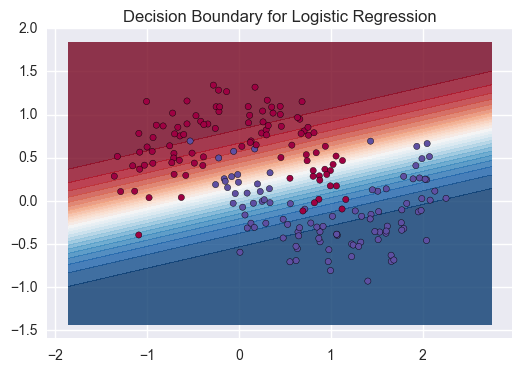

In [9]:
# Build a model
model = build_model()
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for Logistic Regression")
plt.show()


In [10]:
LR = LogisticRegression(penalty='l1', tol=0.0001)
LR.fit(X[:,:-1],Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

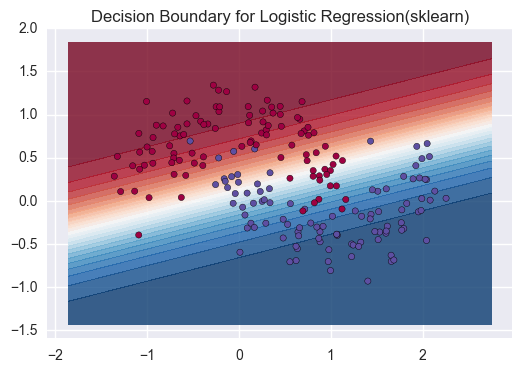

In [18]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = LR.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for Logistic Regression(sklearn)")
plt.show()